# Ivan's E-Commerce Exploratory NoteBook

#####
Data Importing and Pre-processing
- Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
- Clean, wrangle, and handle missing data
- Transform data appropriately using techniques such as aggregation, normalization, and feature construction
- Reduce redundant data and perform need based discretization

Data Analysis and Visualization
- Identify categorical, ordinal, and numerical variables within data
- Provide measures of centrality and distribution with visualizations
- Diagnose for correlations between variables and determine independent and dependent variables
- Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

Data Analytics
- Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
- Train, test, and provide accuracy and evaluation metrics for model results

Presentation
- In a 5 to 10 minutes video, briefly explain the project workflow from the code and results in your markdown notebook
State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing CSV Dataset from E-Commerce

In [15]:
#Set File Path & import csv
datasetFP = '../data/Dataset 3 (Online Shoppers Intention)/online_shoppers_intention.csv'
eCommerceDF = pd.read_csv(datasetFP) 

#### Getting number of rows and columns

In [14]:
eCommerceDF.shape

(12330, 18)

#### Found when Informational page = 0 Informational Duration = 0

In [17]:
eCommerceDF.groupby(['Informational'])['Informational_Duration'].mean()

Informational
0.0        0.000000
1.0       72.384123
2.0      139.785144
3.0      191.345717
4.0      254.306293
5.0      396.399345
6.0      422.321253
7.0      390.512416
8.0      503.889031
9.0      705.293704
10.0     602.566667
11.0    1258.833333
12.0     651.145476
13.0    1949.166667
14.0     893.783334
16.0    1210.397619
24.0    2050.433333
Name: Informational_Duration, dtype: float64

In [18]:
eCommerceDF.loc[eCommerceDF['Informational'].isnull()&eCommerceDF['Informational_Duration'].notnull()&eCommerceDF['Informational_Duration'].eq(0),'Informational'] = 0

#### Filling missing PageValue based on mean of Revenue when False

In [19]:
revenueGroupBy = round(eCommerceDF.groupby(['Revenue'])['PageValues'].mean(),2)
revenueGroupBy

Revenue
False     1.99
True     27.35
Name: PageValues, dtype: float64

In [20]:
eCommerceDF.loc[eCommerceDF['PageValues'].isnull()&eCommerceDF['Revenue'].notnull()&eCommerceDF['Revenue'].eq(False),'PageValues'] = revenueGroupBy[0]

#### Could not find a good way to fill for Operating Systems -> opted to drop remaining values ~1% dropped 

In [23]:
eCommerceDF.shape[0]

12330

In [24]:
eCommerceDF = eCommerceDF.dropna()

In [25]:
eCommerceDF.shape[0]

12164

#### Log Normalized Data

In [29]:
eCommerceDF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Informational_log'],
      dtype='object')

<AxesSubplot:>

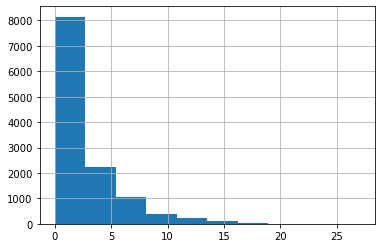

In [30]:
eCommerceDF['Informational'].hist()

In [31]:
eCommerceDF['Informational_log'] = np.log2(eCommerceDF['Informational'])

In [36]:
eCommerceDF.corr()['Revenue']


Administrative             0.137313
Administrative_Duration    0.095587
Informational              0.093731
Informational_Duration     0.068876
ProductRelated             0.158276
ProductRelated_Duration    0.152177
BounceRates               -0.150189
ExitRates                 -0.206684
PageValues                 0.492258
SpecialDay                -0.084532
OperatingSystems          -0.013245
Browser                    0.023551
Region                    -0.012348
TrafficType               -0.002355
Weekend                    0.030136
Revenue                    1.000000
Informational_log          0.027290
Informational_sqrt         0.109714
Name: Revenue, dtype: float64

In [40]:
subset = eCommerceDF[eCommerceDF['Revenue']=='True']
#subset.corr()